In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import qmc
from scipy.stats import norm

general Parameters

In [9]:
T = 1
k = 3
d = 2**k
delta_t = T/d

S_0 = 100
mu = 0.045
sigma = 0.3

mc_runs = 100


Create Brownian Bridges

In [10]:
def create_BB(d, delta_t):
    h = d                       #h : Differenz der Punkte in Indexpunkten
    X = np.empty((mc_runs,d+1))       #+1 damit die 0 am Anfang mit dabei ist
    X[:,0] = 0
    X[:,d] = np.sqrt(d * delta_t) * np.random.randn(mc_runs)
    for i in range(k):
        h = int(h/2)
        pos = h
        for j in range(2**i):
            X[:,pos] = (1/2) * X[:,pos - h] + (1/2) * X[:,pos + h] + np.sqrt((1/2) * h * delta_t) * np.random.randn(mc_runs)
            #print(pos)
            pos = pos + 2*h
    plt.plot(X.T)
    plt.show()
    return X

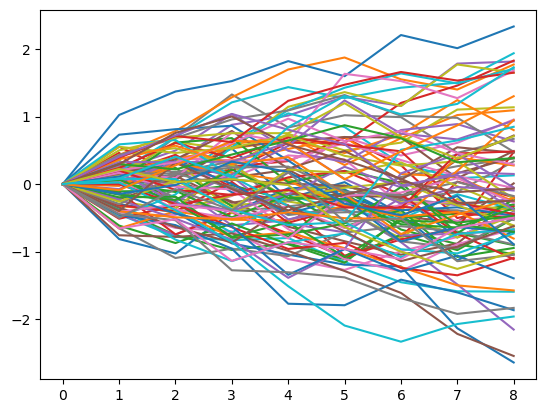

array([[ 0.00000000e+00, -1.74423155e-02,  3.98786777e-01,
        -1.21881648e-01, -2.42259569e-01, -7.99414849e-02,
        -5.06722997e-01, -7.83517491e-01, -4.30508916e-01],
       [ 0.00000000e+00,  2.99257673e-01,  6.06433652e-02,
         5.88519153e-01,  7.08957943e-01,  2.80985627e-01,
         6.79284783e-01,  1.02196581e+00,  1.09252230e+00],
       [ 0.00000000e+00,  1.80959223e-02, -1.17860028e-01,
        -1.71398131e-02, -2.41252609e-01, -1.36422397e-01,
        -6.73666511e-01, -8.90321996e-01, -1.03920344e+00],
       [ 0.00000000e+00,  1.49447905e-01,  4.33111689e-01,
        -5.45433146e-02, -3.14279286e-01, -1.06121909e+00,
        -7.82414091e-01,  3.63674222e-02, -1.96467705e-01],
       [ 0.00000000e+00, -7.57401238e-02,  3.32301875e-01,
         8.77076387e-01,  1.01427846e+00,  1.29185182e+00,
         1.15598952e+00,  1.78391417e+00,  1.81493709e+00],
       [ 0.00000000e+00, -2.24135753e-01,  5.78037286e-02,
        -2.58493161e-01, -6.30928058e-01, -8.466708

In [11]:
create_BB(d, delta_t)

Create Asset prices

In [16]:
def create_asset_prices(d, delta_t, S_0, mu, sigma):
    S = np.empty([mc_runs, d+1]) #+1 weil d mal simuliert wird und aber der Startpreis des Assets auch in dem Vektor steht
    
    S[:,0] = S_0

    BM = create_BB(d, delta_t)  #w_0 ist nciht dabei aber interessiert mich auch nicht

    for k in range(mc_runs):
        for i in range(d):
            S[k, i+1] = S[k, 0]*np.exp(sigma*BM[k, i] + (mu-(sigma**2)/2)*(i+1)*delta_t)
    return S
    

Calculate Payoff

In [13]:
def ratched_option(d, delta_t, S_0, mu, sigma): 
    S = create_asset_prices(d, delta_t, S_0, mu, sigma)

    #display(S)
    #indic = np.array([1 if s > 0 else 0 for s in np.diff(S)])
    indic = np.diff(S)>0
    #display(indic)
    #display(S[1:S.size])
    payoff = (indic*S[:,1:S.size]).mean(axis=1)  #python spezifisch fehlt dann das erste Element
    #display(payoff)
    #display(S)
    #display(S[1:(S.size)])
    #display(payoff)

    plt.plot(S.T)
    plt.title("Simulation of "+str(mc_runs)+" sample paths of Asset Prices ")
    plt.show()
    return payoff

# Monte Carlo Simulation

Exaktes Ergebnis

In [14]:
Exp = (S_0/d)*norm.cdf((mu-((sigma**2)/2))*math.sqrt(delta_t)/sigma+sigma*math.sqrt(delta_t))*np.sum(np.exp(mu*delta_t*(np.array(range(d))+1)))
display(Exp)

55.618171509982446

Monte Carlo Simulation mit Brownian Bridges

In [15]:
mc_expectation = ratched_option(d, delta_t, S_0, mu, sigma).mean()
mc_expectation

NameError: name 'create_standard_bm' is not defined